# 표본분포(sampling distribution)

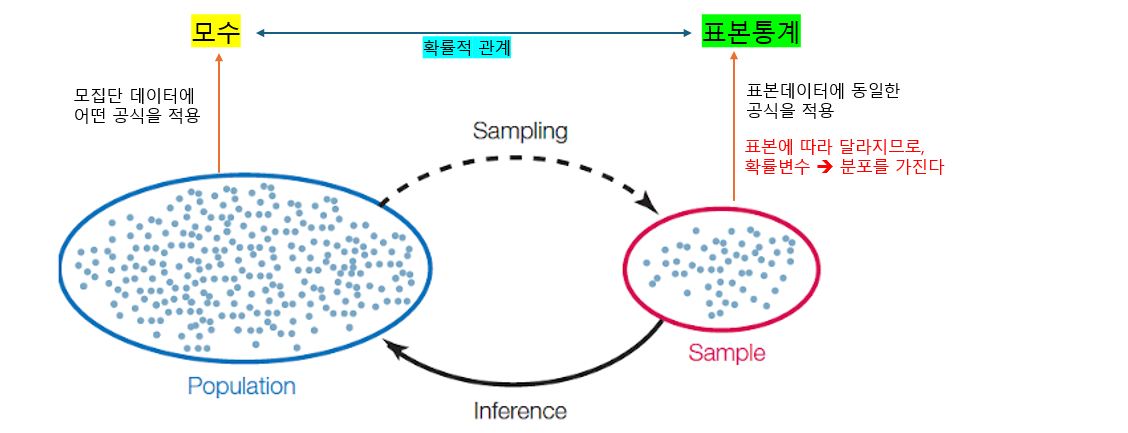

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random  # 난수추출 library
import numpy as np

In [2]:
# X는 추천의향이며, 0~10점 척도로 조사한다고 하자 (NPS).
# 가상의 모집단 데이터를 읽어 오자

X=pd.read_csv('pop.csv').set_index('pop_id')
X

,recommend
pop_id,
1,0
2,3
3,3
4,1
5,3
...,...
9996,3
9997,3
9998,2


<Axes: ylabel='Frequency'>

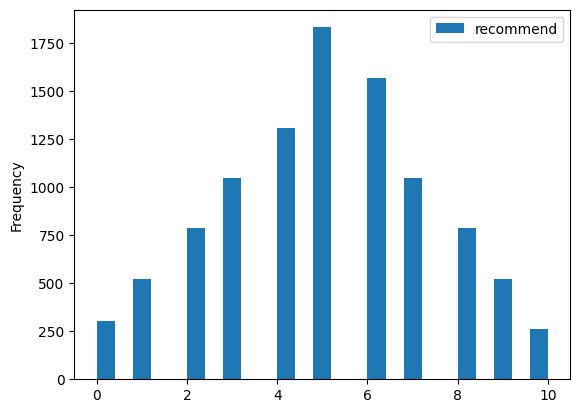

In [3]:
#모집단에서 X의 분포
X.plot(kind='hist', bins=25)

In [40]:
# 모집단에서 크기가 n 인 표본을 추출한다

N=len(X) # 모집단 크기  # len은 행의 수
n=20     # 표본 크기 지정

# N개 모집단에서 n개 표본을 뽑는 가지수는 몇개일까?

In [47]:
# 모집단에서 크기가 n 인 표본을 하나 추출하여, 표본평균을 구해보자

N=len(X) # 모집단 크기, len()은 행의 수 계산
n=10     # 표본 크기 지정

print("percentage of sample =", 100*n/N, "%")

q = random.sample(range(1,N+1),n)   # 1에서 N까지 pop_id 중에서 n개를 추출 (중복없이, 비복원)
x = X.loc[q, 'recommend']           # 모집단 데이터(X)에서 index가 q인 데이터만 추출하여 x에 저장
x
print("the sample mean is ", x.mean() )  # 표본평균은 고정된 값이 아니라 확률변수이다, 실행할때마다 표본이 달라지고 따라서 값이 바뀜


percentage of sample = 0.1 %
the sample mean is  5.2


표본의 추출방법은 모두 몇가지일까?

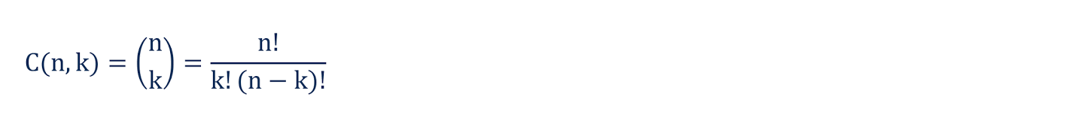

In [48]:
import math
math.comb(N,  n)

2743355077591282538231819720749000

In [49]:
# 표본평균의 분포를 구해보자
# 위의 과정을 K번 반복해서 K개의 표본평균을 계산하여 기록한다.

K=1000    # K가 작으므로 결과가 정확하지는 않다

xbar=[]   # 표본평균 list 초기화
for i in range(0,K):
  q = random.sample(range(1,N+1),n)   # 1에서 N까지 정수 중에서 n개를 추출 (중복없이, 비복원)
  m = X.loc[q, 'recommend'].mean()    # 표본에서 평균을 구하여,
  xbar.append(m)                      # xbar list에 계속 붙여 넣는다
xbar=pd.DataFrame({'sample_mean':xbar})  # 어레이를 데이터프레임으로 바꾸면 여러가지 그림을 그리기 쉽다
xbar

,sample_mean
0,5.5
1,5.8
2,5.1
3,5.2
4,4.6
...,...
995,6.2
996,4.8
997,4.0
998,5.9


<Axes: ylabel='Density'>

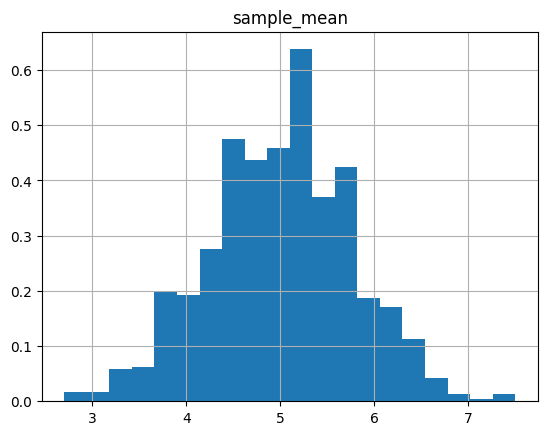

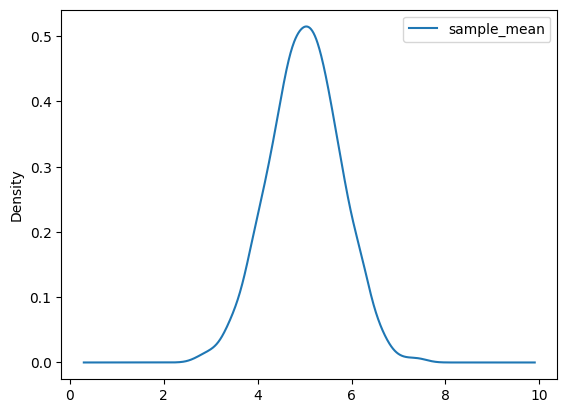

In [53]:
xbar.hist(density=True, bins=20)
xbar.plot(kind='kde') # 히스토그램을 smoothing

In [51]:
print("X의 표본평균의 표준편차는 ", xbar.mean())
print("X의 표본평균의 표준편차는 ", xbar.std())

X의 표본평균의 표준편차는  sample_mean    5.0036
dtype: float64
X의 표본평균의 표준편차는  sample_mean    0.754849
dtype: float64


In [52]:
print("X의 모집단 평균은", X.mean())
print("X의 모집단 표준편차는 ", X.std())

X의 모집단 평균은 recommend    5.0042
dtype: float64
X의 모집단 표준편차는  recommend    2.374604
dtype: float64


통계학자들은 다음과 같은 중요한 성질을 증명하였다.

> 위의 작업에서 K를 매우 크게 하면 이 정리가 성립한다


1.   표본의 수에 관계없이, 표본평균의 평균(기대값)은 **모평균**과 같다.
2.   표본의 수에 관계없이, 표본평균의 표준편차는 **모표준편차/root(표본수)** 와 같다.

3.   모집단 분포와 관계없이 표본의 수가 증가할수록 표본평균의 분포형태는 **정규분포**로 수렴한다





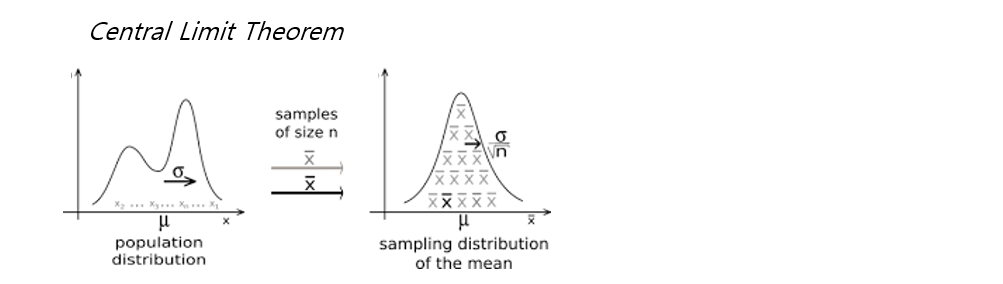

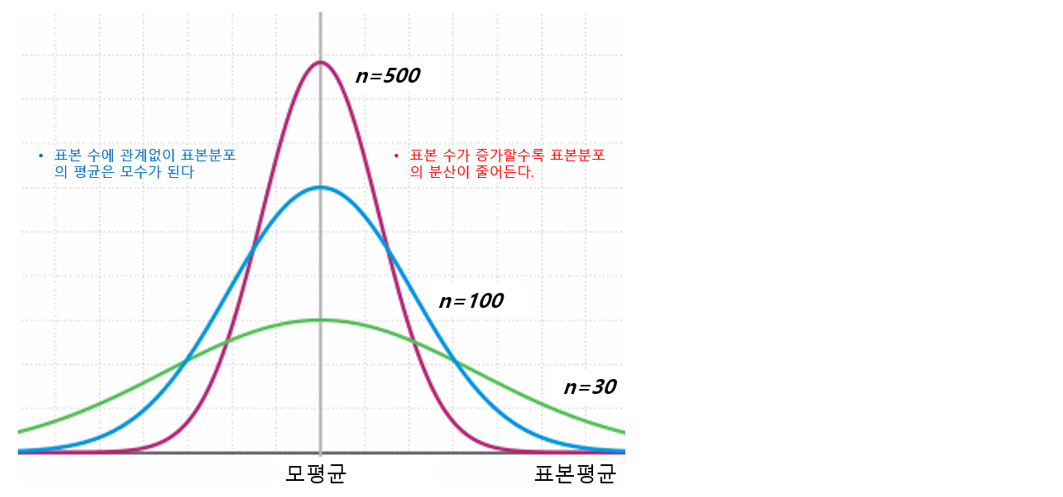



---


이것이 통계적추론(statistical inference)의 기초가 된다.


표본평균과 모평균의 관계뿐만이 아니라

모든 표본통계는 해당 모수와 다르지만, 완전히 별개가 아니라 일정한 확률적 관계를 가지고 있다.

이 관계를 잘 활용하면, 관찰된 표본통계에 근거하여 해당 모수가 일정한 범위에 있을 확률을 구할 수 있고,

이 확률을 사용하여 모수에 대한 가설검정을 할수 있다.

==

p-값은 이러한 통계적 추론의 결과를 함축적으로 표현하여 준다 (추후 다시 설명).